#### 충청남도 관광 사업체 수


In [84]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='NanumMyeongjoOTF') # For MacOS
#print(plt.rcParams['font.family'])

#행정안전부의 지방행정 인허가데이터를 가공한 csv파일. 
df = pd.read_csv('20240821165102_업종별 관광사업체 수.csv',encoding='cp949')
df

,업종명,기준년도,상위업종명,영업현황수
0,전체,2024,전체,1473
1,전체,2024,여행업,612
2,국내외여행업,2024,여행업,305
3,국내여행업,2024,여행업,220
4,종합여행업,2024,여행업,87
5,전체,2024,관광객 이용시설업,408
6,일반야영장업,2024,관광객 이용시설업,307
7,자동차야영장업,2024,관광객 이용시설업,66
8,외국인관광도시민박업,2024,관광객 이용시설업,17
9,전문휴양업,2024,관광객 이용시설업,12


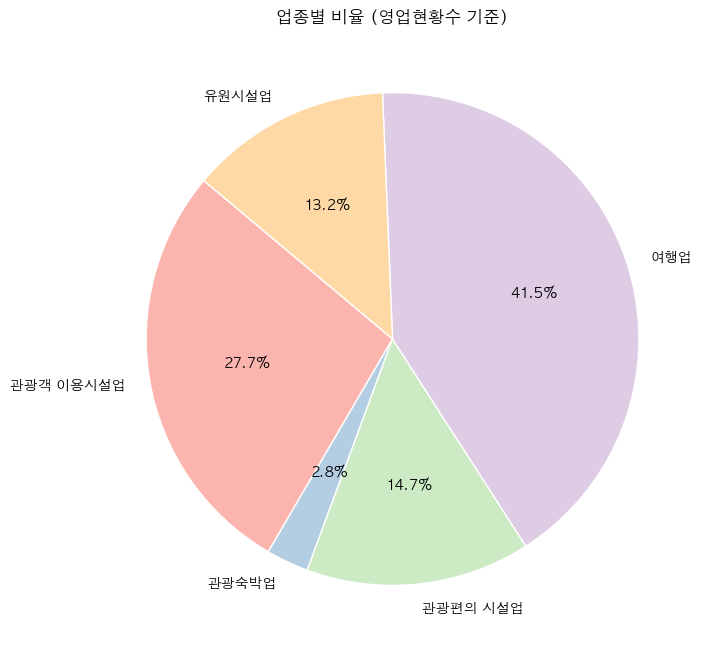

In [53]:
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정 (Mac에서는 AppleGothic 사용)
rc('font', family='AppleGothic')

# '업종명'이 '전체'이고 '상위업종명'이 '전체'가 아닌 데이터만 필터링
filtered_df = df[(df['업종명'] == '전체') & (df['상위업종명'] != '전체')]

# '영업현황수'를 기준으로 각 상위업종명의 비율을 계산
data = filtered_df.groupby('상위업종명')['영업현황수'].sum()

# 비율 계산 (전체 영업현황수 대비 각 상위업종명이 차지하는 비율)
sizes = (data / data.sum()) * 100
labels = data.index

# 파스텔 톤 색상 맵 생성 (matplotlib의 'Pastel1' 색상 맵 사용)
pastel_colors = plt.get_cmap('Pastel1').colors

# 원형 차트 생성
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=pastel_colors, wedgeprops={'edgecolor': 'white'})

# 차트 제목 추가
plt.title('업종별 비율 (영업현황수 기준)')

# 차트 표시
plt.show()


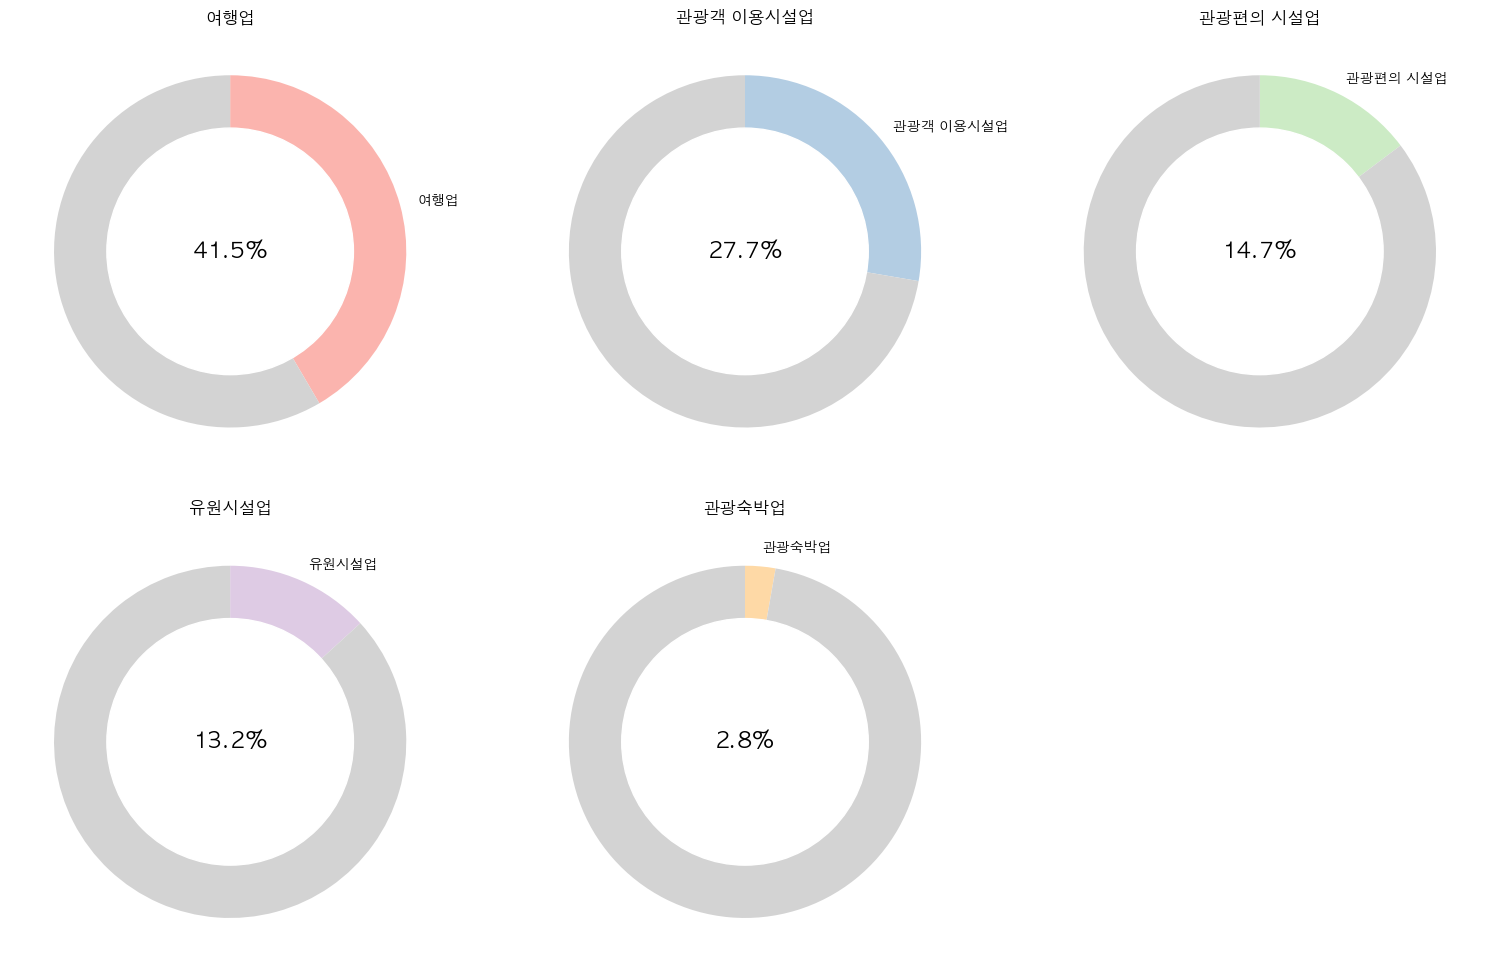

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rc

# 한글 폰트 설정 (Mac에서는 AppleGothic 사용)
rc('font', family='AppleGothic')

# 데이터 예시 (필요시 실제 데이터로 대체)
# df = pd.read_csv('파일경로.csv', encoding='cp949')

# 예시 데이터 필터링 (업종명 '전체'와 상위업종명 '전체'가 아닌 데이터)
filtered_df = df[(df['업종명'] == '전체') & (df['상위업종명'] != '전체')]

# 원형 차트의 개수
num_charts = len(filtered_df)
cols = 3  # 열 개수
rows = -(-num_charts // cols)  # 행 개수 계산

# 서브플롯 생성
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5), subplot_kw=dict(aspect='equal'))

# 파스텔 톤 색상 맵 생성 (matplotlib의 'Pastel1' 색상 맵 사용)
pastel_colors = plt.get_cmap('Pastel1').colors

# 서브플롯이 2D 배열이 아니라면, 단일 서브플롯으로 변환
if rows == 1 or cols == 1:
    axes = np.reshape(axes, (-1,))

# 각 행에 대해 원형 차트를 생성
for idx, (ax, (i, row)) in enumerate(zip(axes.flatten(), filtered_df.iterrows())):
    # 현재 행의 데이터 추출
    category = row['상위업종명']
    status_count = row['영업현황수']

    # 비율 계산
    total_count = filtered_df['영업현황수'].sum()
    sizes = [status_count, total_count - status_count]  # 비율 및 나머지
    labels = [category, '']  # '기타' 대신 빈 문자열로 설정

    # 색상 설정: 비율 부분 색상과 나머지 부분 색상
    chart_colors = [pastel_colors[idx % len(pastel_colors)], 'lightgrey']

    # 원형 차트 생성
    wedges, texts = ax.pie(
        sizes,
        labels=labels,
        autopct=None,  # % 텍스트는 직접 추가할 것이므로 기본 텍스트 비활성화
        startangle=90,  # 12시 방향에서 시작
        colors=chart_colors,
        counterclock=False  # 시계방향으로 표시
    )

    # 원형 차트의 가운데에 흰색 원 추가
    center_circle = plt.Circle((0, 0), 0.7, color='white', fc='white')
    ax.add_artist(center_circle)

    # % 표시를 위해 중심에 텍스트 추가
    ax.text(0, 0, f'{sizes[0]/sum(sizes)*100:.1f}%', 
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=16,
            color='black',
            fontweight='bold')

    # 제목 추가
    ax.set_title(f'{category}', fontsize=12)

# 남은 서브플롯 제거 (데이터가 적어서 서브플롯이 비어 있을 경우)
for j in range(idx + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

# 레이아웃 조정
plt.tight_layout()
plt.show()


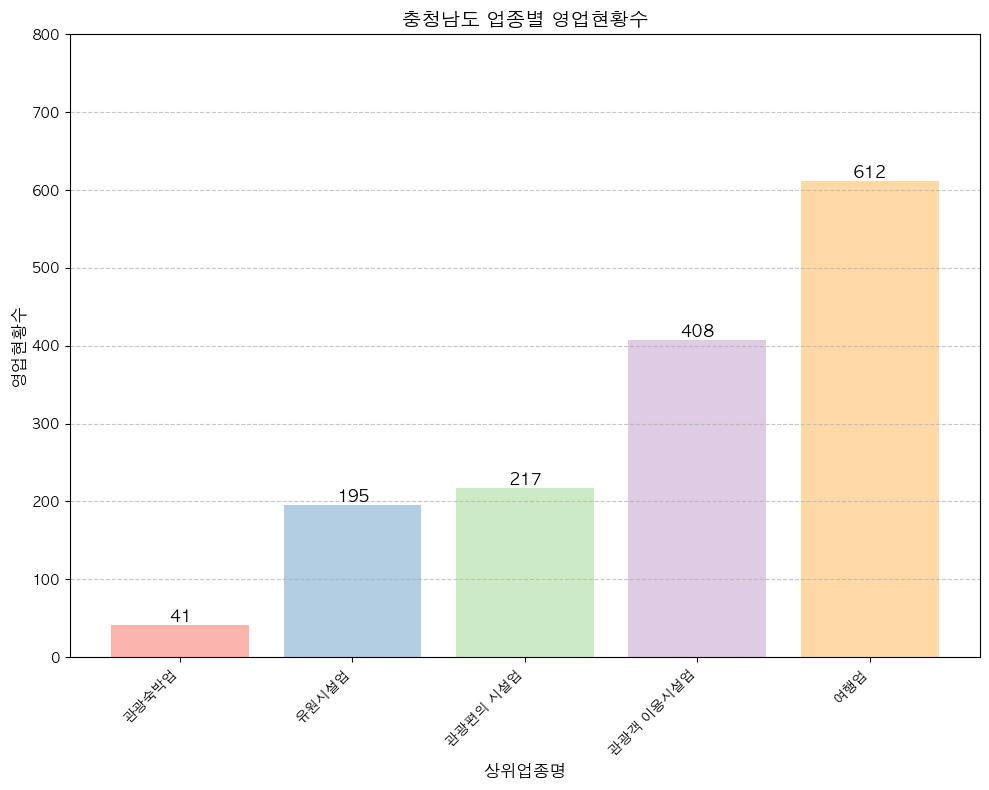

In [105]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc

# 한글 폰트 설정 (Mac에서는 AppleGothic 사용)
rc('font', family='AppleGothic')

# 데이터 예시 (필요시 실제 데이터로 대체)
# df = pd.read_csv('파일경로.csv', encoding='cp949')

# 예시 데이터 필터링 (업종명 '전체'와 상위업종명 '전체'가 아닌 데이터)
filtered_df = df[(df['업종명'] == '전체') & (df['상위업종명'] != '전체')]

# '상위업종명'별로 '영업현황수' 집계
data = filtered_df.groupby('상위업종명')['영업현황수'].sum().sort_values()

# 세로 막대 차트 그리기
plt.figure(figsize=(10, 8))
bars = plt.bar(data.index, data.values, color=plt.get_cmap('Pastel1').colors[:len(data)])

# 각 막대에 값 추가
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, 
             f'{height}', 
             ha='center', 
             va='bottom', 
             fontsize=12, 
             color='black', 
             fontweight='bold')

# 제목과 레이블 추가
plt.title('충청남도 업종별 영업현황수', fontsize=14)
plt.xlabel('상위업종명', fontsize=12)
plt.ylabel('영업현황수', fontsize=12)
plt.xticks(rotation=45, ha='right')  # X축 레이블 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Y축에만 격자선 추가
# Y축 최대 값 설정
plt.ylim(0, 800)


# 레이아웃 조정
plt.tight_layout()
plt.show()



##### 천안시 관광 사업체 수 

- 여행업을 제외한 다른 시설업, 숙박업은 처참하기 그지없다. 관광 인프라 부족 주장 가능!

In [82]:
df = pd.read_csv('20240821165102_천안시_서북구_업종별 관광사업체 수.csv',encoding='cp949')
df

,업종명,기준년도,상위업종명,영업현황수
0,전체,2024,전체,1473
1,전체,2024,여행업,612
2,국내외여행업,2024,여행업,305
3,국내여행업,2024,여행업,220
4,종합여행업,2024,여행업,87
5,전체,2024,관광객 이용시설업,408
6,일반야영장업,2024,관광객 이용시설업,307
7,자동차야영장업,2024,관광객 이용시설업,66
8,외국인관광도시민박업,2024,관광객 이용시설업,17
9,전문휴양업,2024,관광객 이용시설업,12


In [78]:
df = pd.read_csv('20240821182249천안시_동남구_업종별 관광사업체 수.csv',encoding='cp949')
df

,업종명,기준년도,상위업종명,영업현황수
0,전체,2024,전체,144
1,전체,2024,여행업,83
2,국내외여행업,2024,여행업,42
3,국내여행업,2024,여행업,32
4,종합여행업,2024,여행업,9
5,전체,2024,관광객 이용시설업,34
6,일반야영장업,2024,관광객 이용시설업,22
7,자동차야영장업,2024,관광객 이용시설업,7
8,종합휴양업,2024,관광객 이용시설업,2
9,전문휴양업,2024,관광객 이용시설업,2


In [98]:
import pandas as pd

# 파일 경로 설정
file1 = '20240821182249천안시_동남구_업종별 관광사업체 수.csv'
file2 = '20240821182258_천안시_서북구_업종별 관광사업체 수.csv'

# 데이터 읽어오기
df1 = pd.read_csv(file1, encoding='cp949')
df2 = pd.read_csv(file2, encoding='cp949')

# 데이터 합치기
combined_df = pd.concat([df1, df2], ignore_index=True)


# 합쳐진 데이터 확인
# 쫌 더럽게 합쳐짐.
print(combined_df)

# 합쳐진 데이터 저장
combined_df.to_csv('combined_data.csv', index=False, encoding='cp949')


            업종명  기준년도      상위업종명  영업현황수
0            전체  2024         전체    144
1            전체  2024        여행업     83
2        국내외여행업  2024        여행업     42
3         국내여행업  2024        여행업     32
4         종합여행업  2024        여행업      9
5            전체  2024  관광객 이용시설업     34
6        일반야영장업  2024  관광객 이용시설업     22
7       자동차야영장업  2024  관광객 이용시설업      7
8         종합휴양업  2024  관광객 이용시설업      2
9         전문휴양업  2024  관광객 이용시설업      2
10   외국인관광도시민박업  2024  관광객 이용시설업      1
11           전체  2024      유원시설업     22
12    유원시설업(기타)  2024      유원시설업     17
13      일반유원시설업  2024      유원시설업      3
14      종합유원시설업  2024      유원시설업      2
15           전체  2024      관광숙박업      3
16        가족호텔업  2024      관광숙박업      1
17        관광호텔업  2024      관광숙박업      1
18     휴양콘도미니엄업  2024      관광숙박업      1
19           전체  2024   관광편의 시설업      2
20      관광극장유흥업  2024   관광편의 시설업      1
21        한옥체험업  2024   관광편의 시설업      1
22           전체  2024         전체    136
23           전체  2024        여행업     99


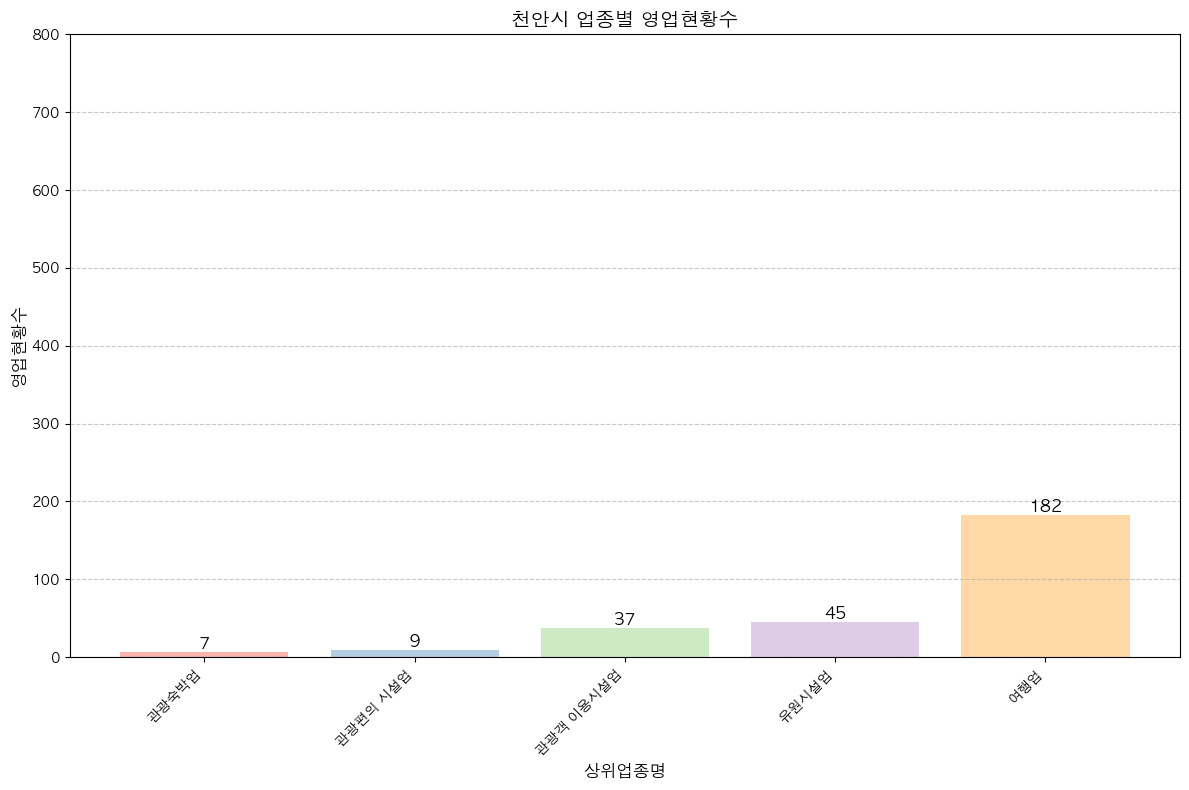

In [102]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc

# 한글 폰트 설정 (Mac에서는 AppleGothic 사용)
rc('font', family='AppleGothic')

# 합쳐진 데이터 읽어오기
combined_df = pd.read_csv('combined_data.csv', encoding='cp949')

# 예시 데이터 필터링 (업종명 '전체'와 상위업종명 '전체'가 아닌 데이터)
filtered_df = combined_df[(combined_df['업종명'] == '전체') & (combined_df['상위업종명'] != '전체')]

# '상위업종명'별로 '영업현황수' 집계
data = filtered_df.groupby('상위업종명')['영업현황수'].sum().sort_values()

# 파스텔 톤 색상 맵 생성 (matplotlib의 'Pastel1' 색상 맵 사용)
pastel_colors = plt.get_cmap('Pastel1').colors

# 세로 막대 차트 그리기
plt.figure(figsize=(12, 8))
bars = plt.bar(data.index, data.values, color=pastel_colors[:len(data)])

# 각 막대에 값 추가
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, 
             f'{height}', 
             ha='center', 
             va='bottom', 
             fontsize=12, 
             color='black', 
             fontweight='bold')

# 제목과 레이블 추가
plt.title('천안시 업종별 영업현황수', fontsize=14)
plt.xlabel('상위업종명', fontsize=12)
plt.ylabel('영업현황수', fontsize=12)
plt.xticks(rotation=45, ha='right')  # X축 레이블 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Y축에만 격자선 추가

# Y축 최대 값 설정
plt.ylim(0, 800)
#충남이랑 비교를 위해 최댓갑 800으로.

# 레이아웃 조정
plt.tight_layout()
plt.show()


In [ ]:
도넛차트는 작게 보여주기로,,

/var/folders/6y/9r5t2yv91tv_xlty4q28bqn40000gn/T/ipykernel_27482/1497512938.py:26: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  center_circle = plt.Circle((0, 0), 0.7, color='white', fc='white', edgecolor='black', linewidth=1.5)


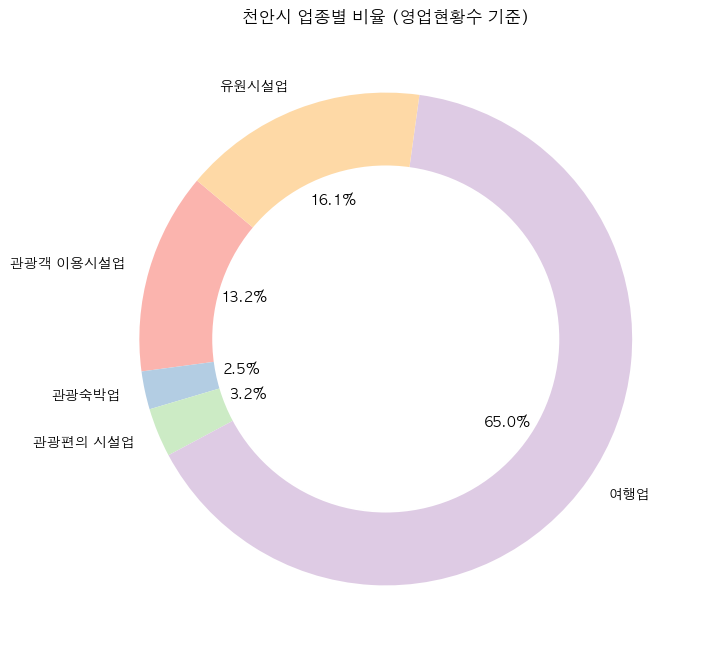

In [103]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc

# 한글 폰트 설정 (Mac에서는 AppleGothic 사용)
rc('font', family='AppleGothic')

# 합쳐진 데이터 읽어오기
combined_df = pd.read_csv('combined_data.csv', encoding='cp949')

# 예시 데이터 필터링 (업종명 '전체'와 상위업종명 '전체'가 아닌 데이터)
filtered_df = combined_df[(combined_df['업종명'] == '전체') & (combined_df['상위업종명'] != '전체')]

# '상위업종명'별로 '영업현황수' 집계
data = filtered_df.groupby('상위업종명')['영업현황수'].sum()

# 비율 계산 (전체 영업현황수 대비 각 상위업종명이 차지하는 비율)
sizes = (data / data.sum()) * 100
labels = data.index

# 도넛형 차트 생성
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3}, colors=plt.get_cmap('Pastel1').colors[:len(labels)])

# 도넛형 차트의 가운데를 비우는 옵션
center_circle = plt.Circle((0, 0), 0.7, color='white', fc='white', edgecolor='black', linewidth=1.5)
plt.gca().add_artist(center_circle)

# 제목 추가
plt.title('천안시 업종별 비율 (영업현황수 기준)')

# 차트 표시
plt.show()
